# Kaggle: Sberbank Russian Housing Exploratory Data Analysis

In [3]:
#######################################
### Import Data Processing Packages ###
#######################################

import pandas            as pd;
import numpy             as np;
import seaborn           as sns;
import matplotlib.pyplot as plt;

from statsmodels.stats.outliers_influence import variance_inflation_factor;
import statsmodels.api as sm;

%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from scipy import stats;

########################################
### Import Machine Learning Packages ###
########################################

from sklearn.preprocessing   import StandardScaler;
from sklearn.preprocessing   import PolynomialFeatures;

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV;
from sklearn.metrics         import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error;

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis;

from sklearn.linear_model    import LinearRegression;
from sklearn.linear_model    import LogisticRegression, LogisticRegressionCV;
from sklearn.linear_model    import Ridge, RidgeCV;
from sklearn.linear_model    import Lasso, LassoCV;
from sklearn.linear_model    import ElasticNet, ElasticNetCV;

from sklearn.neighbors       import KNeighborsClassifier;
from sklearn.tree            import DecisionTreeClassifier;
from sklearn.ensemble        import RandomForestClassifier;
from sklearn.svm             import SVC;
from sklearn.cluster         import KMeans;
from sklearn.decomposition   import PCA;

from sklearn.ensemble        import RandomForestRegressor;
from sklearn.ensemble        import GradientBoostingRegressor;
from sklearn.ensemble        import AdaBoostRegressor;

from sklearn.neural_network  import MLPClassifier;

from sklearn.pipeline import Pipeline;

import xgboost as xgb;

########################
### Import Data Sets ###
########################

#from sklearn                 import datasets;

In [2]:
######################
### Read CSV Files ###
######################

train_df = pd.read_csv('train.csv');
test_df  = pd.read_csv('test.csv');

macro_df = pd.read_csv('macro.csv')

###############################################
### Convert Timestamp to a More Useful Form ###
###############################################

###################################################
### Convert Timestamp Object to DateTime Object ###
###################################################

train_df['timestamp'] =  pd.to_datetime(train_df['timestamp'])
test_df['timestamp']  =  pd.to_datetime(test_df['timestamp'])
macro_df['timestamp'] =  pd.to_datetime(macro_df['timestamp'])

train_df["yearweek"] = train_df["timestamp"].dt.year*100 + train_df["timestamp"].dt.weekofyear;
train_df = train_df.drop('timestamp', axis=1);

test_df["yearweek"] = test_df["timestamp"].dt.year*100 + test_df["timestamp"].dt.weekofyear;
test_df = test_df.drop('timestamp', axis=1);

macro_df["yearweek"] = macro_df["timestamp"].dt.year*100 + macro_df["timestamp"].dt.weekofyear;
macro_df = macro_df.drop('timestamp', axis=1);

In [5]:
################################################
### Inspect training data statistics of data ###
################################################

train_df.describe()

id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000   
mean       1.827121  3.068057e+03      1.909804      6.399301      2.107025   
std        1.481154  1.543878e+05      0.851805     28.265979      0.880148   
min        1.000000  0.000000e+00      0.000000      0.000000      1.000000   
25%        1.000000  1.967000e+03      1.000000      1.000000      1.000000   
50%        1.000000  1.979000e+03      2.000000      6.000000      2.000000   
75%        2.000000  2.005000e+03      2.000000      9.000000      3.000000   
max        6.000000  2.005201e+07     19.000000   2014.000000     33.000000   

           ...        cafe_count_5000_price_4000  cafe_count_5000_price_high  \
count      ...                      30471.000000                30471.000000   
mean       ...                         10.783860                    1.771783   
std        ...                         28.385679                    5.418807   
min        ...                          0.000000                    0.000000   
25%        ...                          1.000000                    0.000000   
50%        ...                          2.000000                    0.000000   
75%        ...                          5.000000                    1.000000   
max        ...                        147.000000                   30.000000   

       big_church_count_5000  church_count_5000  mosque_count_5000  \
count           30471.000000       30471.000000       30471.000000   
mean               15.045552          30.251518           0.442421   
std                29.118668          47.347938           0.609269   
min                 0.000000           0.000000           0.000000   
25%                 2.000000           9.000000           0.000000   
50%                 7.000000          16.000000           0.000000   
75%                12.000000          28.000000           1.000000   
max               151.000000         250.000000           2.000000   

       leisure_count_5000  sport_count_5000  market_count_5000     price_doc  \
count        30471.000000      30471.000000       30471.000000  3.047100e+04   
mean             8.648814         52.796593           5.987070  7.123035e+06   
std             20.580741         46.292660           4.889219  4.780111e+06   
min              0.000000          0.000000           0.000000  1.000000e+05   
25%              0.000000         11.000000           1.000000  4.740002e+06   
50%              2.000000         48.000000           5.000000  6.274411e+06   
75%              7.000000         76.000000          10.000000  8.300000e+06   
max            106.000000        218.000000          21.000000  1.111111e+08   

            yearweek  
count   30471.000000  
mean   201373.048702  
std        93.223753  
min    201133.000000  
25%    201317.000000  
50%    201408.000000  
75%    201439.000000  
max    201527.000000  

[8 rows x 277 columns]

In [6]:
################################################
### Inspect training data statistics of data ###
################################################

test_df.describe()

id      full_sq      life_sq        floor    max_floor  \
count   7662.000000  7662.000000  6486.000000  7662.000000  7662.000000   
mean   34304.500000    53.701164    32.660037     7.652571    12.591099   
std     2211.973214    20.104320    22.737855     5.099418     6.659291   
min    30474.000000     0.000000     0.000000     1.000000     0.000000   
25%    32389.250000    39.200000    19.900000     4.000000     9.000000   
50%    34304.500000    50.410000    30.400000     7.000000    14.000000   
75%    36219.750000    63.300000    41.800000    11.000000    17.000000   
max    38135.000000   403.000000   869.000000    41.000000    48.000000   

          material   build_year     num_room     kitch_sq        state  \
count  7662.000000  6613.000000  7662.000000  7662.000000  6968.000000   
mean      1.854216  1820.888099     1.876403     6.938662     1.985792   
std       1.517171   552.993964     0.835665    25.579688     0.820086   
min       1.000000     0.000000     1.000000     0.000000     1.000000   
25%       1.000000  1966.000000     1.000000     1.000000     1.000000   
50%       1.000000  1982.000000     2.000000     7.000000     2.000000   
75%       2.000000  2011.000000     2.000000     9.500000     3.000000   
max       6.000000  2019.000000    19.000000  1968.000000     4.000000   

           ...        cafe_count_5000_price_2500  cafe_count_5000_price_4000  \
count      ...                       7662.000000                 7662.000000   
mean       ...                         35.777865                   12.152310   
std        ...                         76.524992                   29.590097   
min        ...                          0.000000                    0.000000   
25%        ...                          2.000000                    1.000000   
50%        ...                         10.000000                    2.000000   
75%        ...                         25.000000                    5.000000   
max        ...                        374.000000                  145.000000   

       cafe_count_5000_price_high  big_church_count_5000  church_count_5000  \
count                 7662.000000            7662.000000        7662.000000   
mean                     2.007439              16.749152          33.109371   
std                      5.664540              30.706709          49.734993   
min                      0.000000               0.000000           0.000000   
25%                      0.000000               3.000000          10.000000   
50%                      0.000000               7.000000          17.000000   
75%                      1.000000              13.000000          29.000000   
max                     29.000000             150.000000         249.000000   

       mosque_count_5000  leisure_count_5000  sport_count_5000  \
count        7662.000000         7662.000000       7662.000000   
mean            0.412425            9.639650         56.235839   
std             0.608938           21.499687         47.632547   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000         12.000000   
50%             0.000000            2.000000         51.000000   
75%             1.000000            7.000000         79.000000   
max             2.000000          105.000000        212.000000   

       market_count_5000       yearweek  
count        7662.000000    7662.000000  
mean            6.330723  201576.872488  
std             4.956223      34.112027  
min             0.000000  201527.000000  
25%             2.000000  201543.000000  
50%             5.000000  201602.000000  
75%            11.000000  201609.000000  
max            21.000000  201622.000000  

[8 rows x 276 columns]

In [7]:
#############################################
### Inspect macro data statistics of data ###
#############################################

macro_df.describe()

oil_urals     gdp_quart  gdp_quart_growth          cpi          ppi  \
count  2484.000000   2394.000000       2394.000000  2453.000000  2453.000000   
mean     86.467157  16993.230075          1.523726   407.808398   480.216347   
std      27.528709   3187.074480          2.875659    65.895969    70.286366   
min      29.112500   9995.800000         -4.500000   315.100000   337.200000   
25%      61.283300  14925.000000          0.400000   354.000000   438.400000   
50%     101.416500  17442.100000          1.300000   393.000000   473.500000   
75%     109.310000  19284.100000          4.100000   469.400000   520.700000   
max     122.520000  22016.100000          5.200000   531.000000   606.100000   

       gdp_deflator  balance_trade  balance_trade_growth       usdrub  \
count   2119.000000    2453.000000           2394.000000  2481.000000   
mean     110.122308      15.344006             16.846742    40.732406   
std       14.818429       3.878104             16.988727    15.006583   
min       86.721000       5.823000             -4.100000    27.276300   
25%      100.000000      12.785000              7.200000    30.508800   
50%      108.299000      16.041000             10.500000    32.316500   
75%      123.661000      18.076000             21.500000    53.752300   
max      133.160000      21.939000             75.800000    82.276400   

            eurrub      ...        turnover_catering_per_cap  \
count  2481.000000      ...                      2191.000000   
mean     50.444801      ...                      8691.922410   
std      13.905912      ...                      1668.967502   
min      37.445400      ...                      6221.000000   
25%      40.242600      ...                      6943.000000   
50%      42.862200      ...                      8522.000000   
75%      61.323700      ...                     10311.000000   
max      90.881500      ...                     10805.000000   

       theaters_viewers_per_1000_cap  seats_theather_rfmin_per_100000_cap  \
count                     1461.00000                          2191.000000   
mean                       580.51540                             0.443398   
std                         37.98811                             0.016061   
min                        527.00000                             0.410000   
25%                        565.00000                             0.439390   
50%                        603.00000                             0.450700   
75%                        603.00000                             0.453560   
max                        627.00000                             0.458880   

       museum_visitis_per_100_cap  bandwidth_sports  \
count                 1461.000000       1826.000000   
mean                  1245.543463     349902.577766   
std                    162.526951      72146.453110   
min                    993.000000     269768.000000   
25%                   1240.000000     288177.000000   
50%                   1309.000000     329348.000000   
75%                   1309.000000     398451.000000   
max                   1440.000000     463938.000000   

       population_reg_sports_share  students_reg_sports_share  \
count                   1461.00000                1461.000000   
mean                      25.06859                  67.800034   
std                        2.44944                   5.168602   
min                       22.37000                  63.030000   
25%                       23.01000                  64.120000   
50%                       23.01000                  67.850000   
75%                       26.70000                  67.850000   
max                       28.20000                  76.200000   

       apartment_build  apartment_fund_sqm       yearweek  
count      1826.000000         1826.000000    2484.000000  
mean      36282.434830       230615.059255  201317.254026  
std       10761.669111         2944.879242     195.844155  
min       22825.000000       226047.3

In [8]:
################################
### Log-Normalize Price Data ###
################################

train_df['price_doc'] = np.log(train_df['price_doc'])

Look at the correlation map. Looks like it has lots of "sub-blocks" with strong internal correlations. May want to apply a dimensionality reduction method to "compress" these blocks. 

In [ ]:
#####################################
### Training Data Correlation Map ###
#####################################

fig  = plt.figure(figsize=(36, 36), dpi=150);

axes1 = fig.add_subplot(111); 

sns.heatmap(train_df.corr(), ax=axes1, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('corr()')

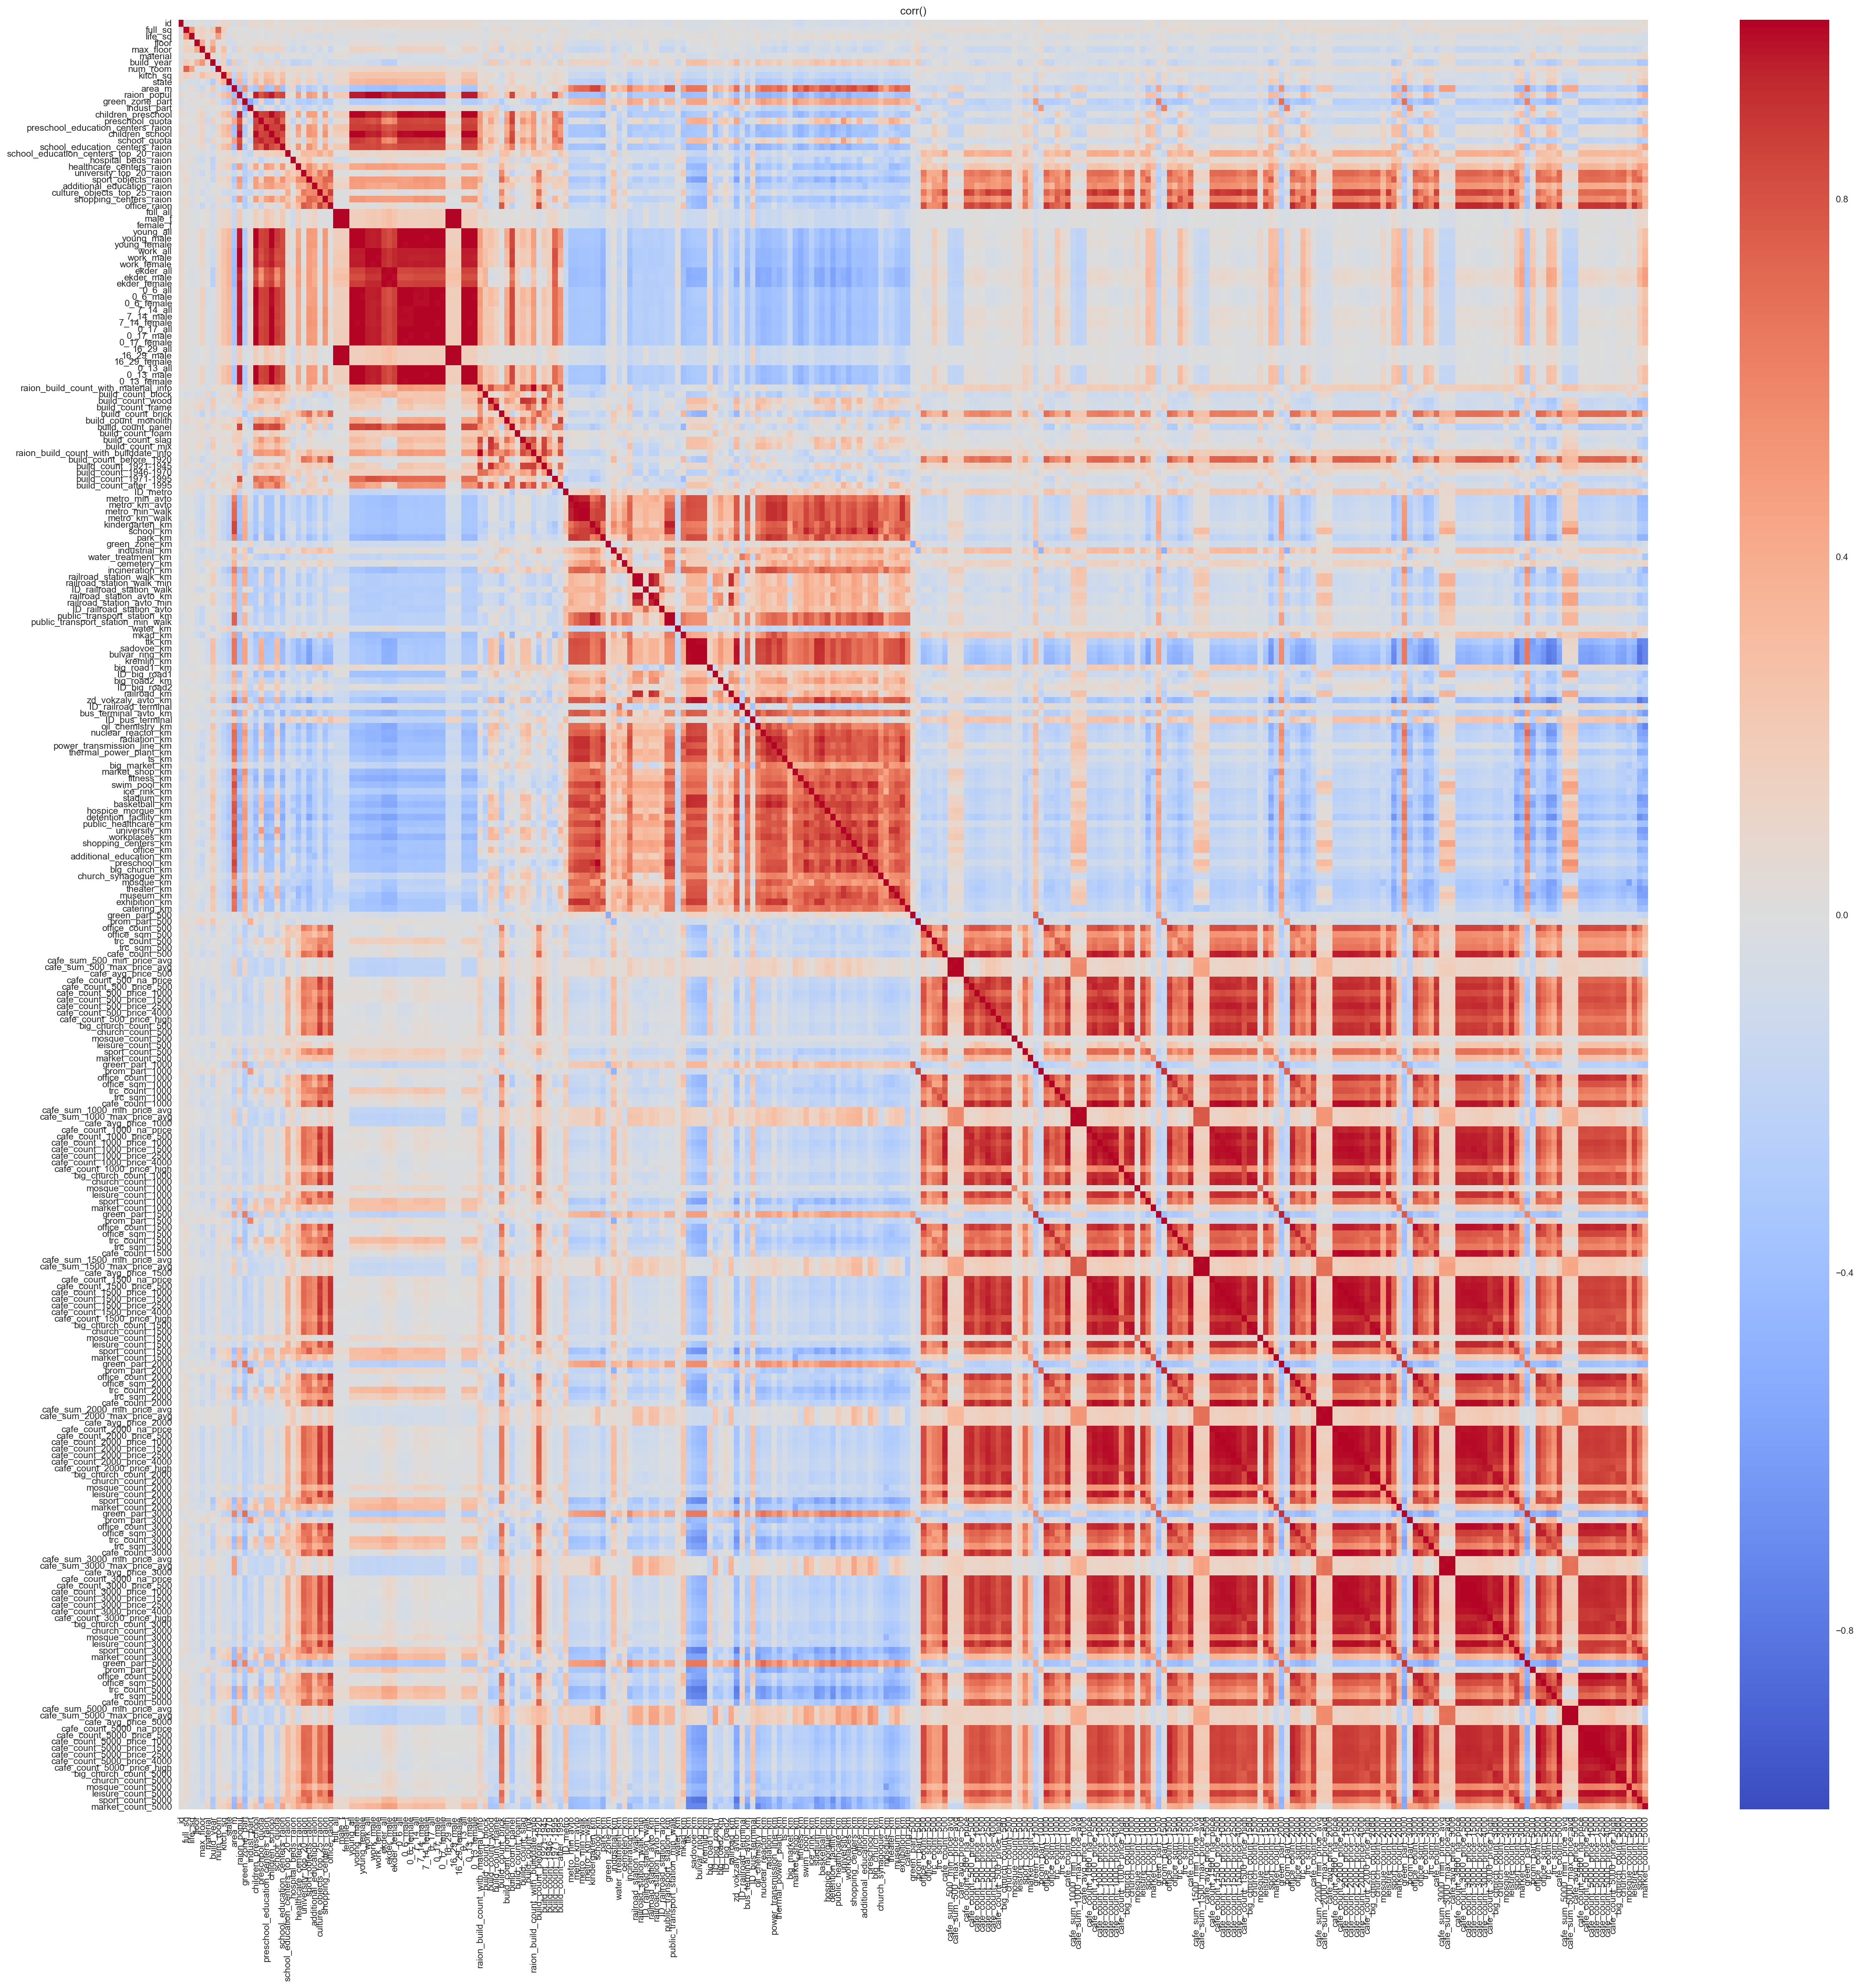

In [158]:
#################################
### Test Data Correlation Map ###
#################################

fig  = plt.figure(figsize=(36, 36), dpi=150);

axes1 = fig.add_subplot(111); 

sns.heatmap(test_df.corr(), ax=axes1, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('corr()')

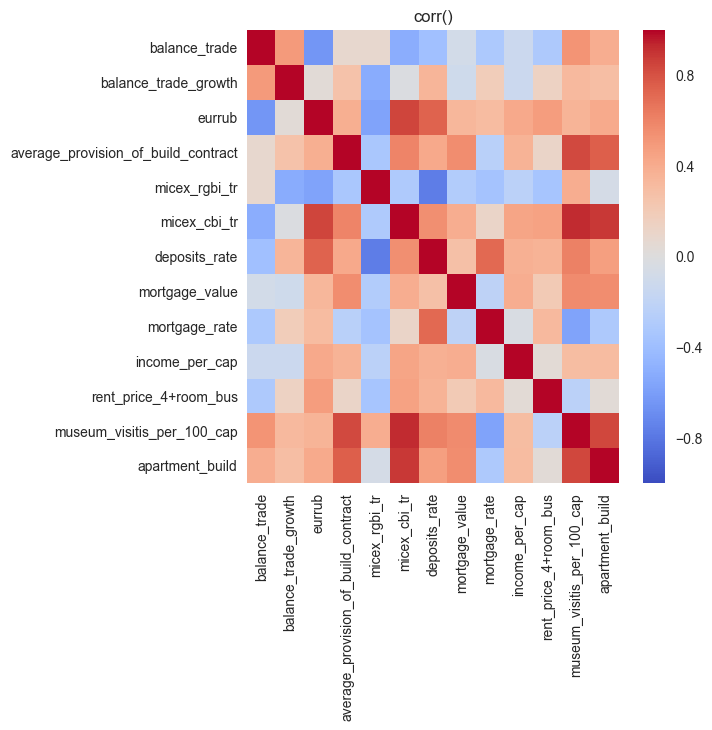

In [160]:
##################################
### Macro Data Correlation Map ###
##################################

fig  = plt.figure(figsize=(6, 6), dpi=100);

axes1 = fig.add_subplot(111); 

sns.heatmap(macro_df.corr(), ax=axes1, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('corr()')

Check price distributions. Prices are highly skewed. Log-normalization makes it appear more Gaussian. There are some peaks at around 13.8 and 14.5 that should be looked into. Could throw off learning algorithms. 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



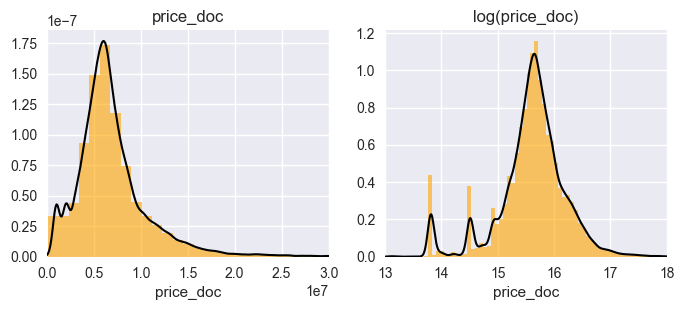

In [140]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot(np.exp(train_df['price_doc'])-1, bins=100, ax=axes1, axlabel='price_doc', kde_kws={"color": "k", "lw": 1.5, "gridsize":1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot(train_df['price_doc'], bins=100, ax=axes2, axlabel='price_doc', kde_kws={"color": "k", "lw": 1.5, "gridsize":1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("price_doc");
axes2.set_title("log(price_doc)");

axes1.set_xlim(0, 3e7);
axes2.set_xlim(13, 18);

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



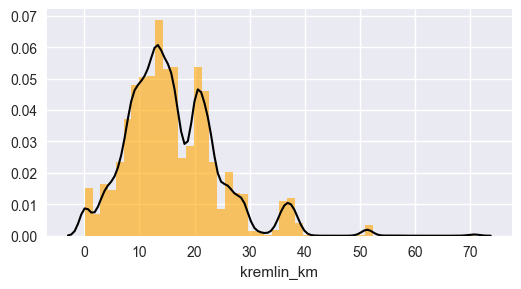

In [12]:
fig  = plt.figure(figsize=(6, 3), dpi=100);

axes1 = fig.add_subplot(111); 

sns.distplot(train_df['kremlin_km'], bins=50, ax=axes1, axlabel='kremlin_km', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
#sns.distplot(np.log(train_df['kremlin_km']+1), bins=100, ax=axes1, axlabel='price_doc', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

#axes1.set_title("price_doc")
#axes2.set_title("Cross Validation")

In [8]:
train_df.loc[train_df['life_sq'] > 1000, 'life_sq'] = np.median(train_df['life_sq'].dropna());
test_df.loc[test_df['life_sq'] > 1000, 'life_sq'] = np.median(test_df['life_sq'].dropna());

train_df.loc[train_df['kitch_sq'] > 250, 'kitch_sq'] = np.median(train_df['kitch_sq'].dropna());
test_df.loc[test_df['kitch_sq'] > 250, 'kitch_sq'] = np.median(test_df['kitch_sq'].dropna());

train_df.loc[train_df['num_room'] > 6, 'num_room'] = np.median(train_df['num_room'].dropna());
test_df.loc[test_df['num_room'] > 6, 'num_room'] = np.median(test_df['num_room'].dropna());

train_df.loc[train_df['build_year'] > 2017, 'build_year'] = np.median(train_df['build_year'].dropna());
train_df.loc[train_df['build_year'] < 1800, 'build_year'] = np.median(train_df['build_year'].dropna());
test_df.loc[train_df['build_year'] > 2017, 'build_year']  = np.median(test_df['build_year'].dropna());
test_df.loc[train_df['build_year'] < 1800, 'build_year'] = np.median(test_df['build_year'].dropna());

train_df.loc[train_df['floor'] > 50, 'floor'] = np.median(train_df['floor'].dropna());
test_df.loc[test_df['floor'] > 50, 'floor']  = np.median(test_df['floor'].dropna());

train_df.loc[train_df['max_floor'] > 60, 'max_floor'] = np.median(train_df['max_floor'].dropna());
test_df.loc[test_df['max_floor'] > 60, 'max_floor'] = np.median(test_df['max_floor'].dropna());

train_df.loc[train_df['metro_km_walk'] > 30, 'metro_km_walk'] = np.median(train_df['metro_km_walk'].dropna());
test_df.loc[train_df['metro_km_walk'] > 30, 'metro_km_walk'] = np.median(test_df['metro_km_walk'].dropna());

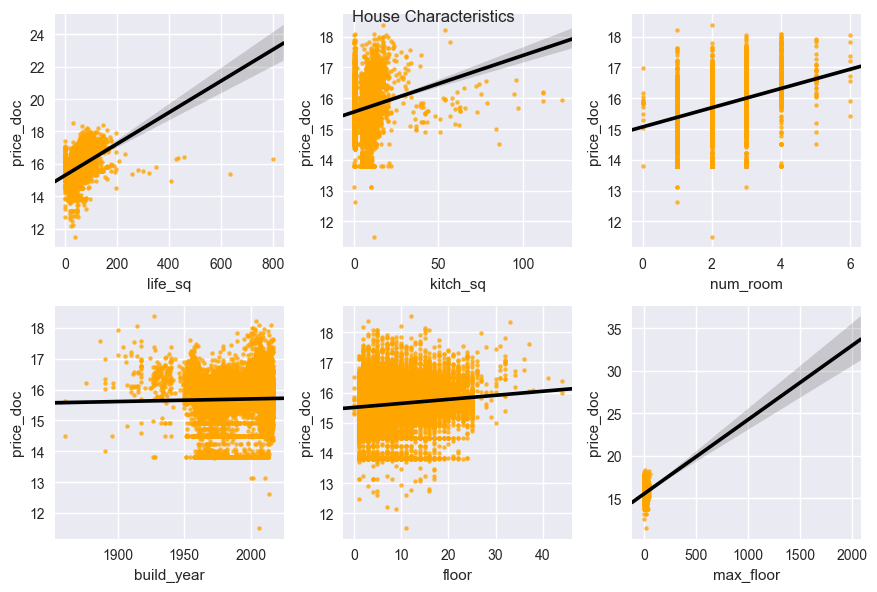

In [9]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('House Characteristics')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='life_sq',    y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='kitch_sq',   y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_room',   y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='build_year', y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='floor',      y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='max_floor',  y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

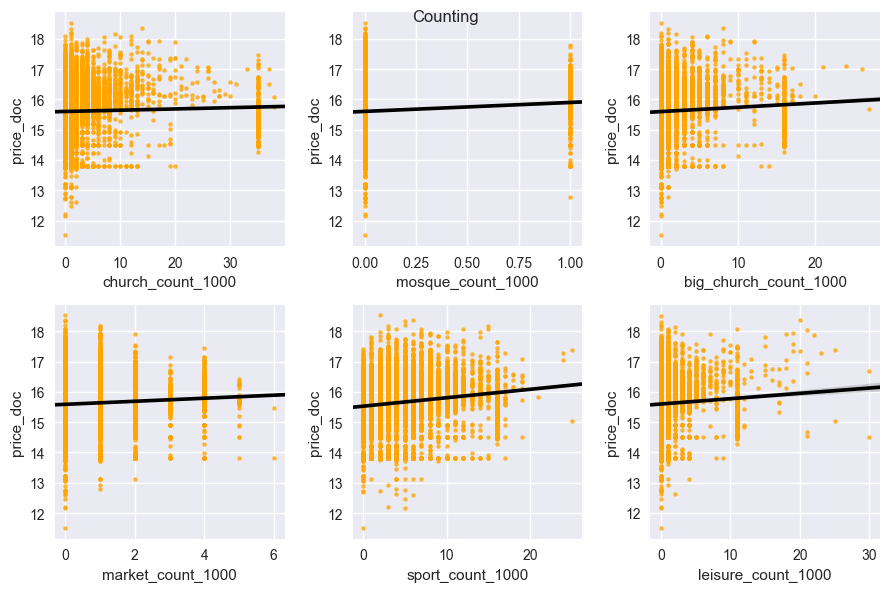

In [10]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Counting')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='church_count_1000',     y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='mosque_count_1000',     y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='big_church_count_1000', y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='market_count_1000',     y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='sport_count_1000',      y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='leisure_count_1000',    y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

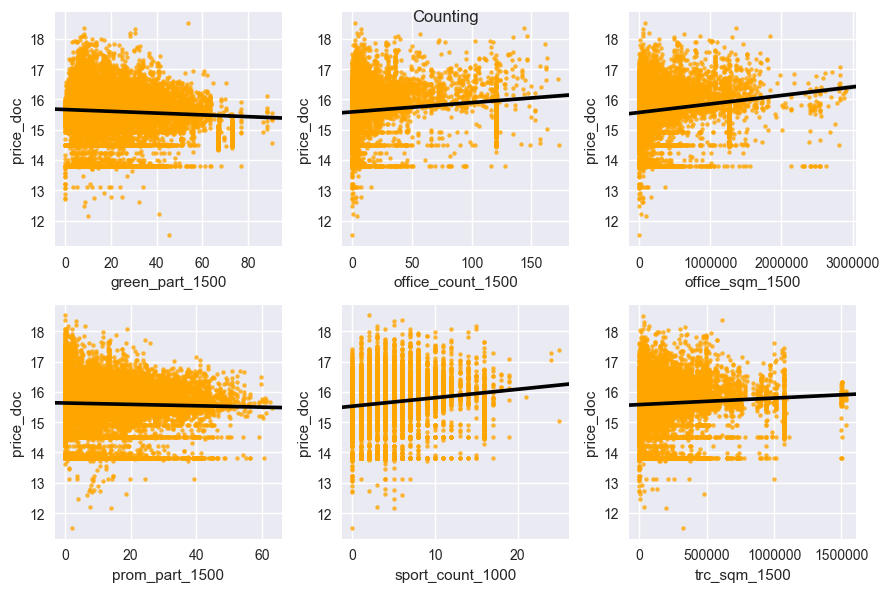

In [11]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Counting')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='green_part_1500',   y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='office_count_1500', y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='office_sqm_1500',   y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='prom_part_1500',    y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='sport_count_1000',  y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='trc_sqm_1500',      y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

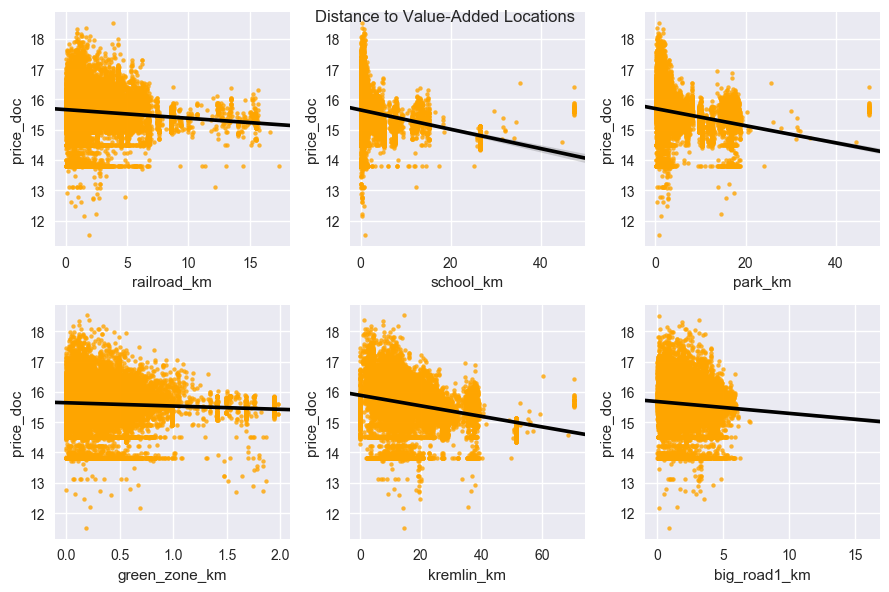

In [142]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Distance to Value-Added Locations')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='railroad_km',   y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='school_km',     y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='park_km',       y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='green_zone_km', y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='kremlin_km',    y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='big_road1_km',  y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

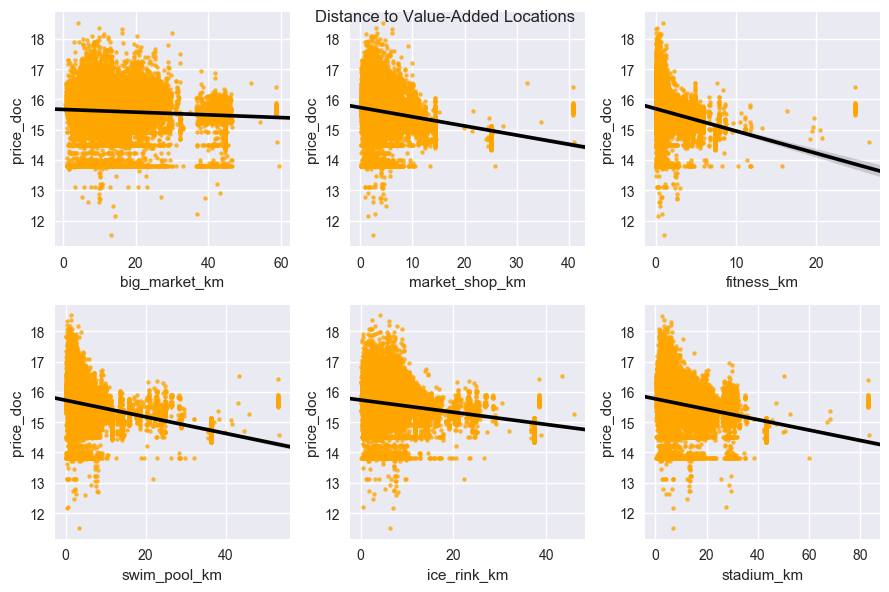

In [143]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Distance to Value-Added Locations')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='big_market_km',  y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='market_shop_km', y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='fitness_km',     y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='swim_pool_km',   y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='ice_rink_km',    y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='stadium_km',     y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

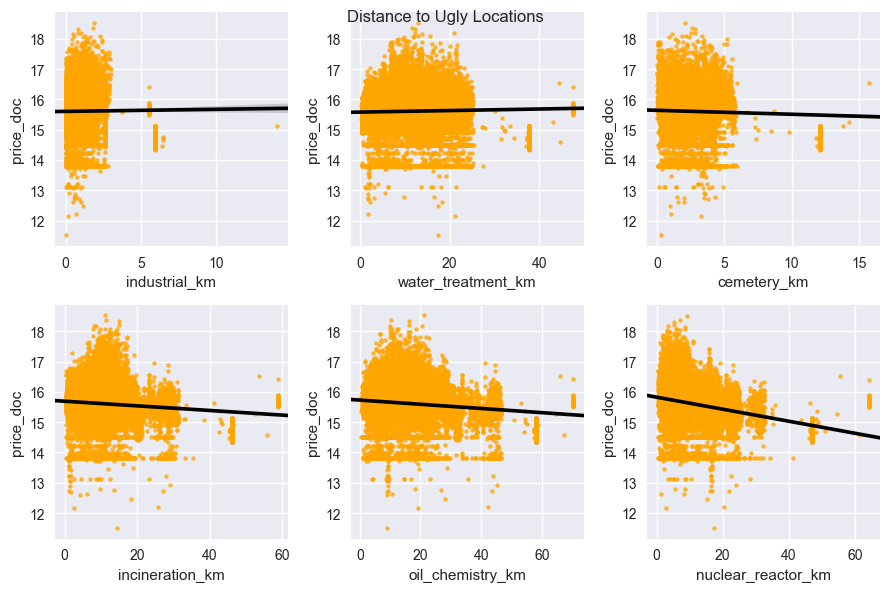

In [146]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Distance to Ugly Locations')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='industrial_km',      y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='water_treatment_km', y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='cemetery_km',        y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='incineration_km',    y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='oil_chemistry_km',   y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='nuclear_reactor_km', y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

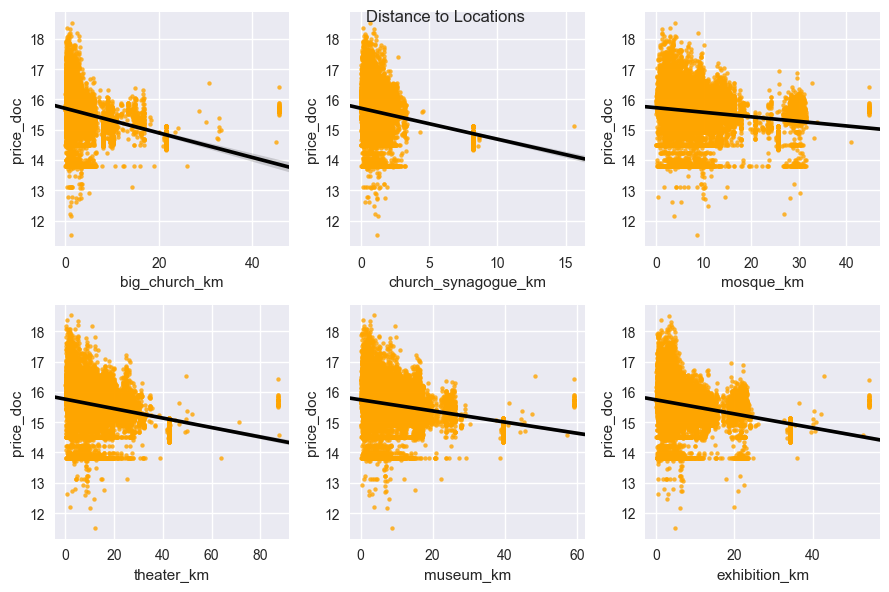

In [147]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Distance to Locations')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='big_church_km',       y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='church_synagogue_km', y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='mosque_km',           y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='theater_km',          y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='museum_km',           y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='exhibition_km',       y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

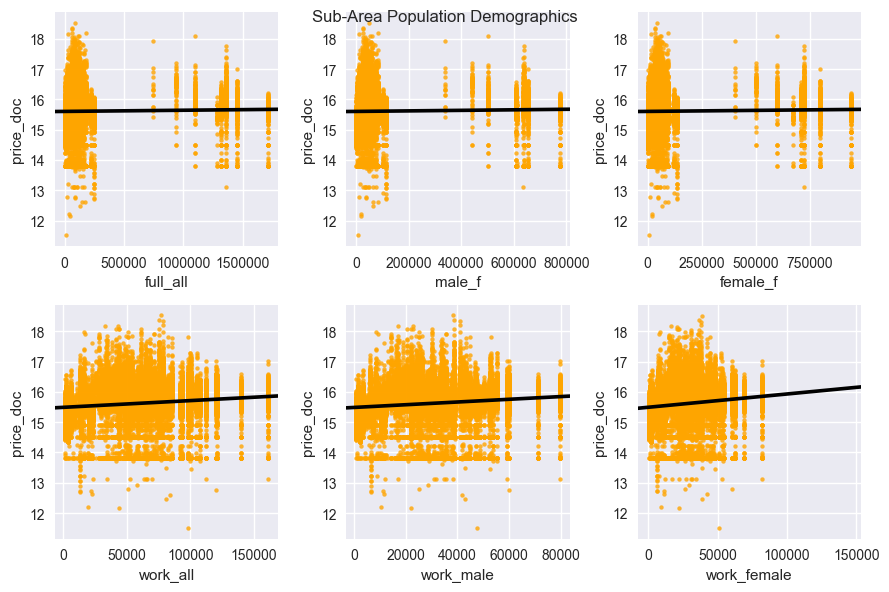

In [12]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Sub-Area Population Demographics')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='full_all',    y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='male_f',      y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='female_f',    y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='work_all',    y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='work_male',   y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='work_female', y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

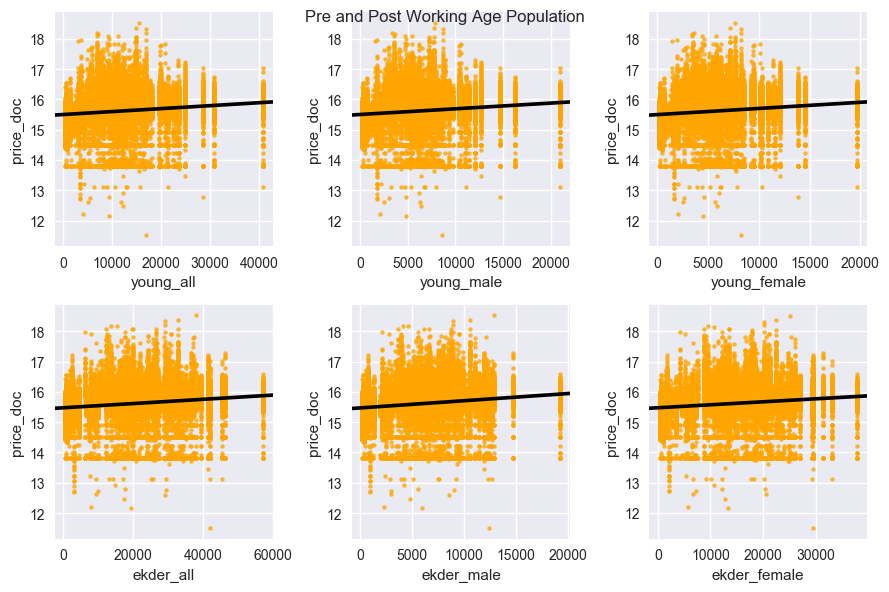

In [13]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Pre and Post Working Age Population')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='young_all',    y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='young_male',   y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='young_female', y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='ekder_all',    y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='ekder_male',   y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='ekder_female', y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

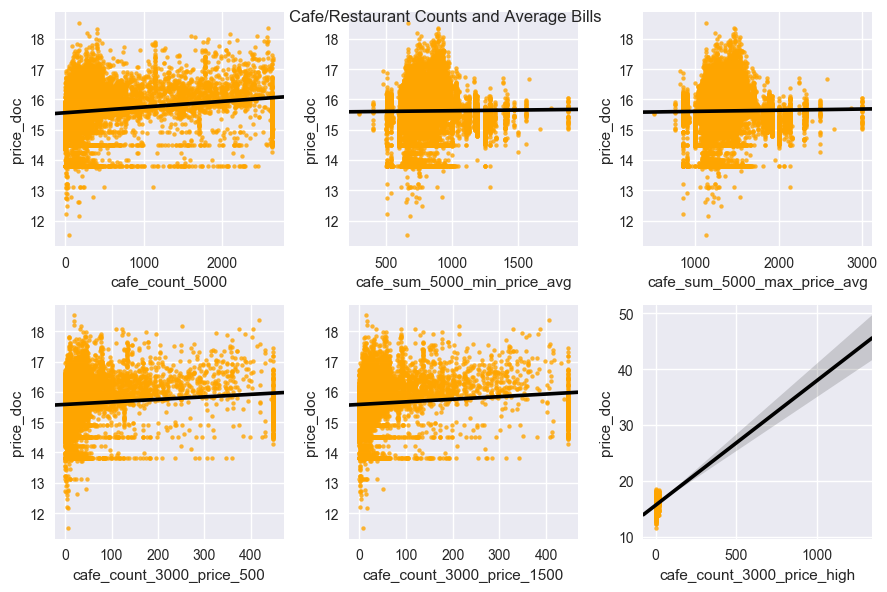

In [122]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Cafe/Restaurant Counts and Average Bills')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='cafe_count_5000',             y='price_doc', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='cafe_sum_5000_min_price_avg', y='price_doc', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='cafe_sum_5000_max_price_avg', y='price_doc', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='cafe_count_3000_price_500',   y='price_doc', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='cafe_count_3000_price_1500',  y='price_doc', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='cafe_count_3000_price_high',  y='price_doc', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

# Macro Correlations

In [14]:
macro_cols.append('price_doc')

In [ ]:
# Macro Data Correlation Map

fig  = plt.figure(figsize=(6, 6), dpi=100);

axes1 = fig.add_subplot(111); 

sns.heatmap(train_df[macro_cols].corr(), ax=axes1, cmap='coolwarm')

plt.title('corr()')

In [21]:
macro_df.columns.values

array(['balance_trade', 'balance_trade_growth', 'eurrub',
       'average_provision_of_build_contract', 'micex_rgbi_tr',
       'micex_cbi_tr', 'deposits_rate', 'mortgage_value', 'mortgage_rate',
       'income_per_cap', 'rent_price_4+room_bus',
       'museum_visitis_per_100_cap', 'apartment_build', 'yearweek'], dtype=object)

(13, 18)

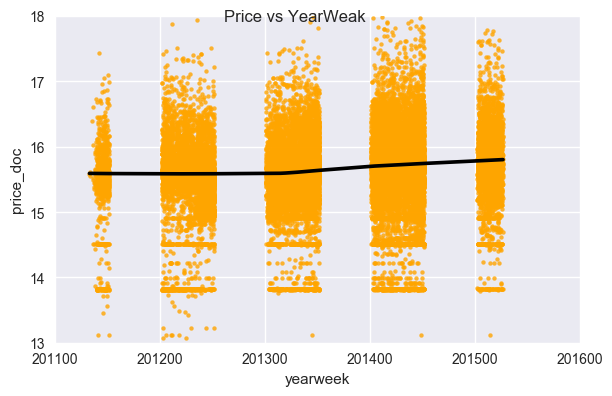

In [31]:
fig  = plt.figure(figsize=(6, 4), dpi=100);

fig.suptitle('Price vs YearWeak')

axes1 = fig.add_subplot(111); 

sns.regplot(x='yearweek', y='price_doc', data=train_df, ax=axes1, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

axes1.set_xlim(201100, 201600);
axes1.set_ylim(13, 18)

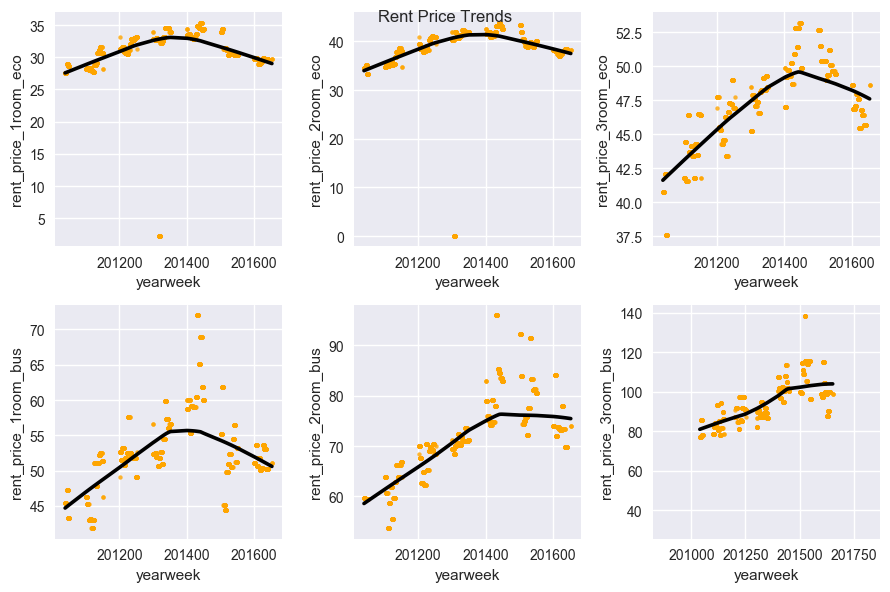

In [32]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Rent Price Trends')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='yearweek', y='rent_price_1room_eco', data=macro_df, ax=axes1, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='rent_price_2room_eco', data=macro_df, ax=axes2, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='rent_price_3room_eco', data=macro_df, ax=axes3, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='rent_price_1room_bus', data=macro_df, ax=axes4, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='rent_price_2room_bus', data=macro_df, ax=axes5, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='rent_price_3room_bus', data=macro_df, ax=axes6, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

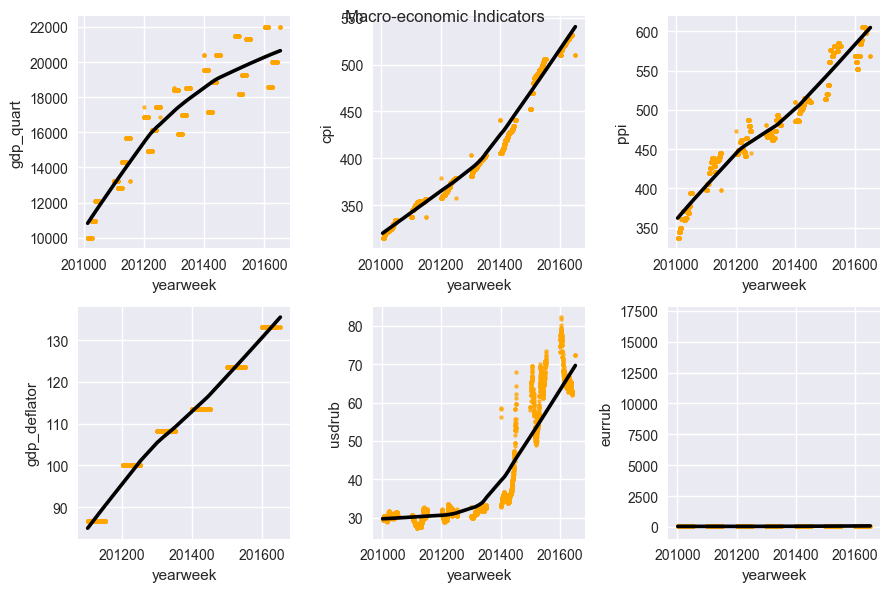

In [33]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Macro-economic Indicators')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='yearweek', y='gdp_quart', data=macro_df, ax=axes1, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='cpi', data=macro_df, ax=axes2, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='ppi', data=macro_df, ax=axes3, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='gdp_deflator', data=macro_df, ax=axes4, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='usdrub', data=macro_df, ax=axes5, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='eurrub', data=macro_df, ax=axes6, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

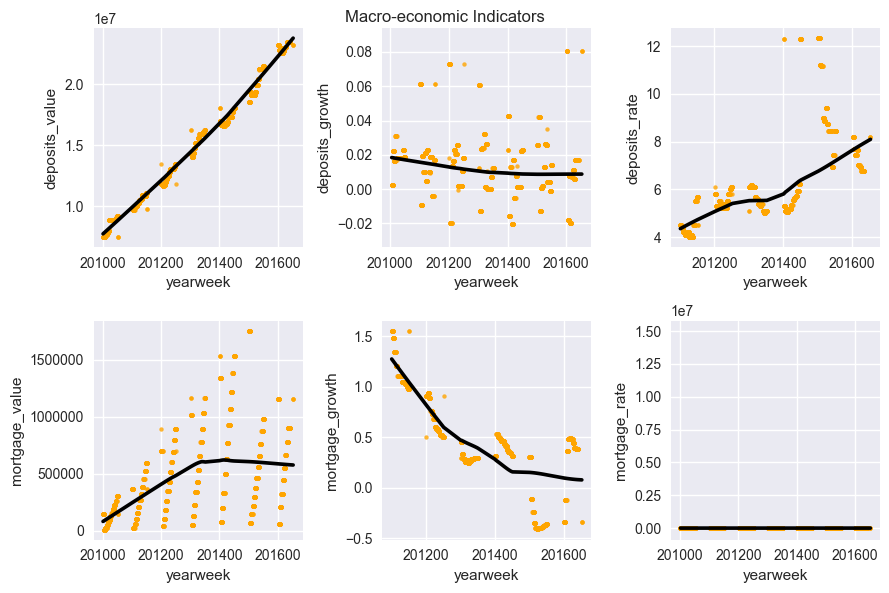

In [34]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Macro-economic Indicators')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='yearweek', y='deposits_value', data=macro_df, ax=axes1, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='deposits_growth', data=macro_df, ax=axes2, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='deposits_rate', data=macro_df, ax=axes3, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='mortgage_value', data=macro_df, ax=axes4, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='mortgage_growth', data=macro_df, ax=axes5, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='mortgage_rate', data=macro_df, ax=axes6, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

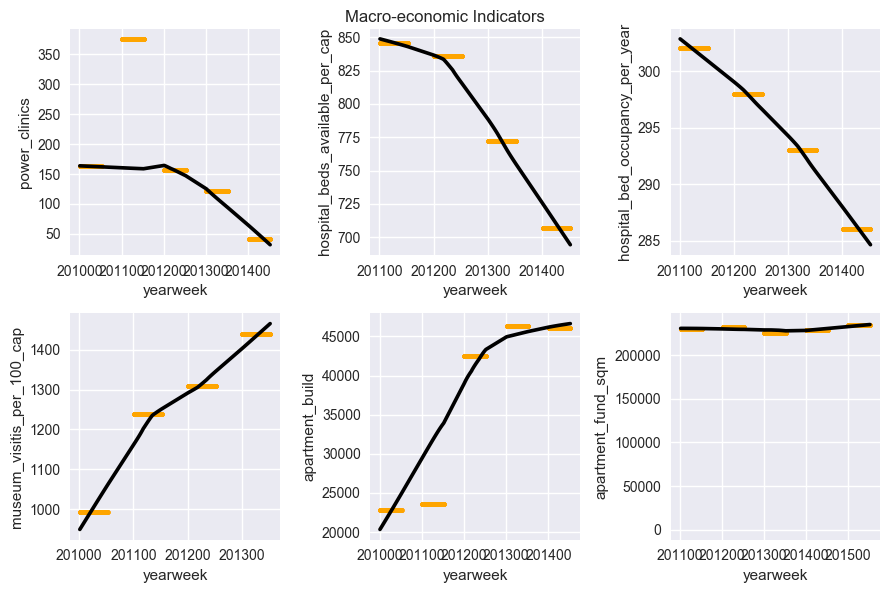

In [35]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

fig.suptitle('Macro-economic Indicators')

axes1 = fig.add_subplot(231); 
axes2 = fig.add_subplot(232); 
axes3 = fig.add_subplot(233); 
axes4 = fig.add_subplot(234); 
axes5 = fig.add_subplot(235); 
axes6 = fig.add_subplot(236); 

sns.regplot(x='yearweek', y='power_clinics', data=macro_df, ax=axes1, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='hospital_beds_available_per_cap', data=macro_df, ax=axes2, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='hospital_bed_occupancy_per_year', data=macro_df, ax=axes3, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='museum_visitis_per_100_cap', data=macro_df, ax=axes4, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='apartment_build', data=macro_df, ax=axes5, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='yearweek', y='apartment_fund_sqm', data=macro_df, ax=axes6, lowess=True, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

# Train vs Test Distributions

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



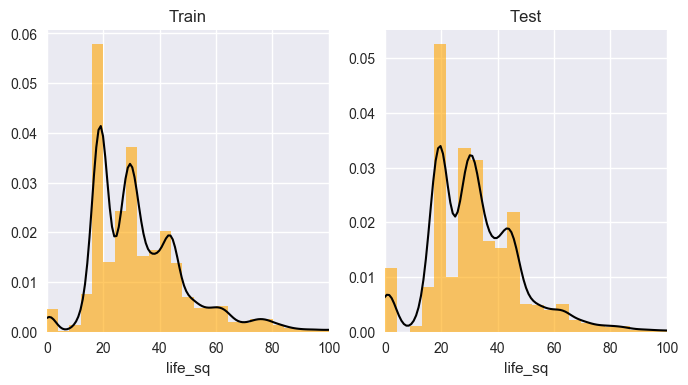

In [21]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.distplot(train_df['life_sq'].dropna(), bins=200, ax=axes1, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes2 = fig.add_subplot(122); 
sns.distplot(test_df['life_sq'].dropna(),  bins=200, ax=axes2, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_xlim(0,100);
axes2.set_xlim(0,100);

axes1.set_title("Train")
axes2.set_title("Test")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



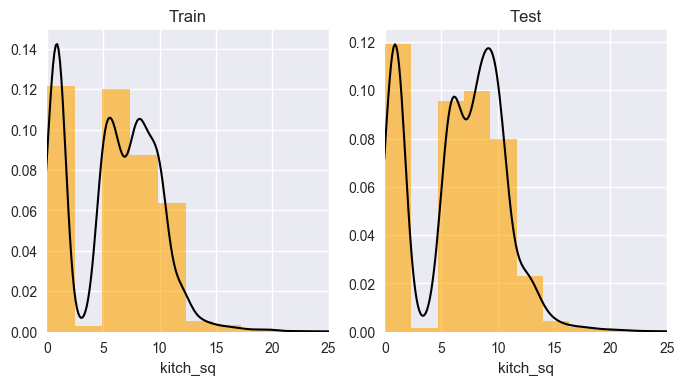

In [37]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.distplot(train_df['kitch_sq'].dropna(), bins=50, ax=axes1, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes2 = fig.add_subplot(122); 
sns.distplot(test_df['kitch_sq'].dropna(),  bins=50, ax=axes2, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_xlim(0, 25);
axes2.set_xlim(0, 25);

axes1.set_title("Train")
axes2.set_title("Test")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



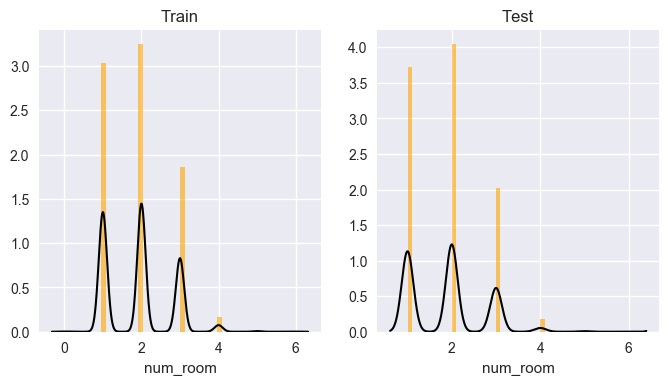

In [41]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.distplot(train_df['num_room'].dropna(), bins=50, ax=axes1, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes2 = fig.add_subplot(122); 
sns.distplot(test_df['num_room'].dropna(),  bins=50, ax=axes2, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

#axes1.set_xlim(0, 25);
#axes2.set_xlim(0, 25);

axes1.set_title("Train")
axes2.set_title("Test")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



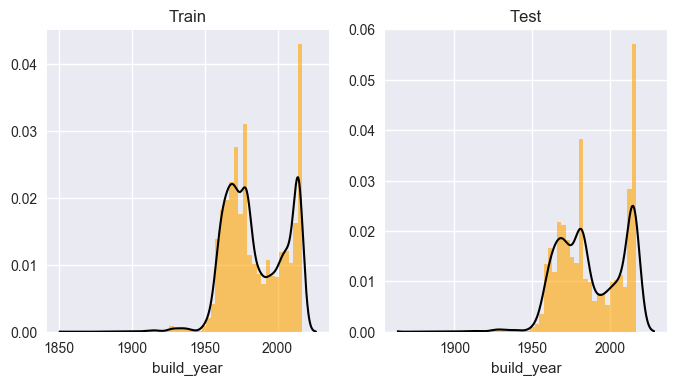

In [42]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.distplot(train_df['build_year'].dropna(), bins=50, ax=axes1, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes2 = fig.add_subplot(122); 
sns.distplot(test_df['build_year'].dropna(),  bins=50, ax=axes2, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

#axes1.set_xlim(0, 25);
#axes2.set_xlim(0, 25);

axes1.set_title("Train")
axes2.set_title("Test")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



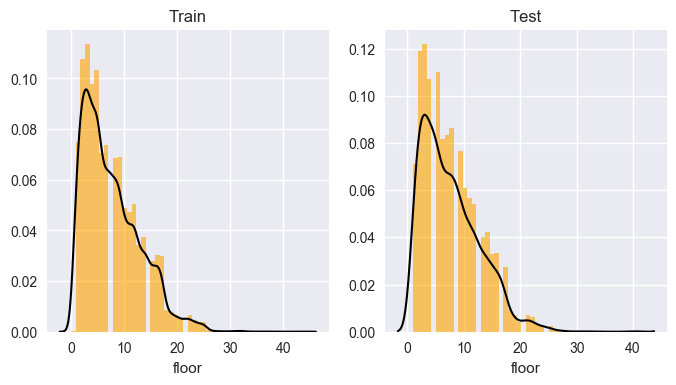

In [43]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.distplot(train_df['floor'].dropna(), bins=50, ax=axes1, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes2 = fig.add_subplot(122); 
sns.distplot(test_df['floor'].dropna(),  bins=50, ax=axes2, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

#axes1.set_xlim(0, 25);
#axes2.set_xlim(0, 25);

axes1.set_title("Train")
axes2.set_title("Test")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



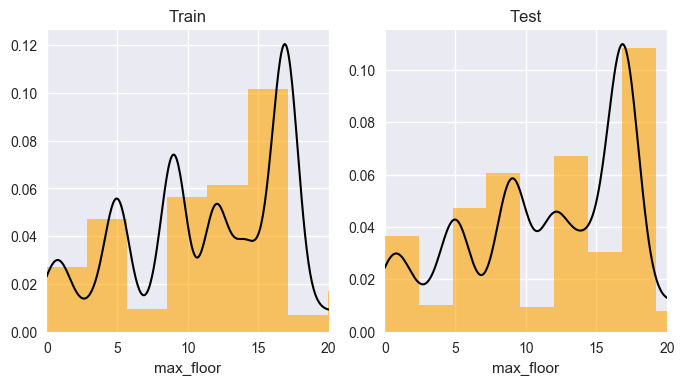

In [47]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.distplot(train_df['max_floor'].dropna(), bins=20, ax=axes1, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes2 = fig.add_subplot(122); 
sns.distplot(test_df['max_floor'].dropna(),  bins=20, ax=axes2, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_xlim(0, 20);
axes2.set_xlim(0, 20);

axes1.set_title("Train")
axes2.set_title("Test")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



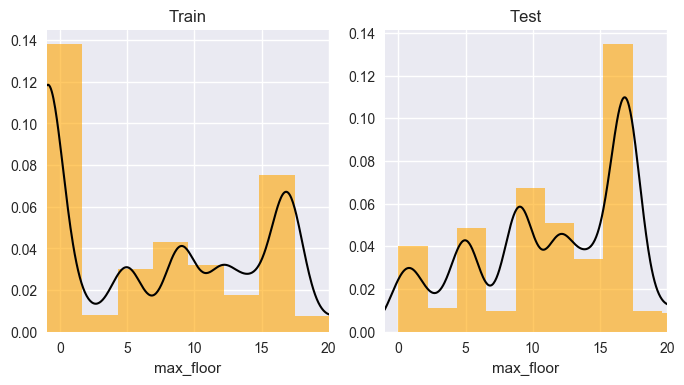

In [50]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.distplot(train_df['max_floor'].fillna(-1), bins=22, ax=axes1, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes2 = fig.add_subplot(122); 
sns.distplot(test_df['max_floor'].fillna(-1),  bins=22, ax=axes2, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_xlim(-1, 20);
axes2.set_xlim(-1, 20);

axes1.set_title("Train")
axes2.set_title("Test")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



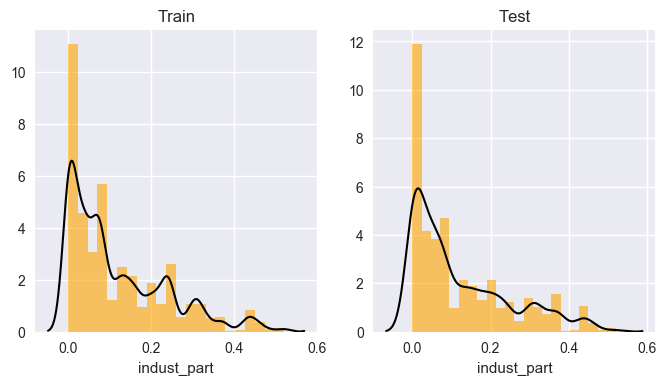

In [74]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.distplot(train_df['indust_part'].fillna(-1), bins=22, ax=axes1, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes2 = fig.add_subplot(122); 
sns.distplot(test_df['indust_part'].fillna(-1),  bins=22, ax=axes2, kde_kws={"color": "k", "lw": 1.5, "gridsize": 1000}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

#axes1.set_xlim(-1, 20);
#axes2.set_xlim(-1, 20);

axes1.set_title("Train")
axes2.set_title("Test")

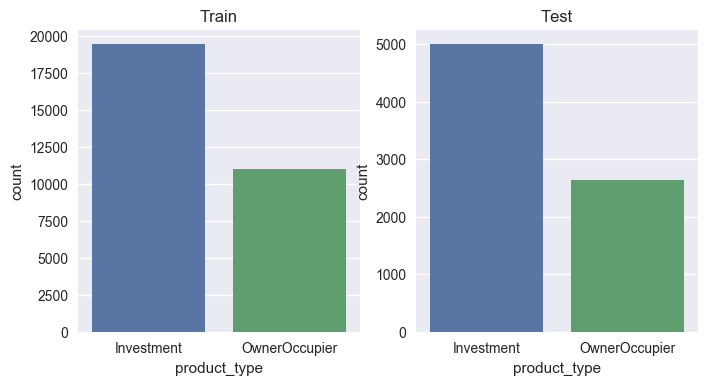

In [57]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.countplot(train_df['product_type'].dropna(), ax=axes1);

axes2 = fig.add_subplot(122); 
sns.countplot(test_df['product_type'].dropna(), ax=axes2);

#axes1.set_xlim(-1, 20);
#axes2.set_xlim(-1, 20);

axes1.set_title("Train")
axes2.set_title("Test")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



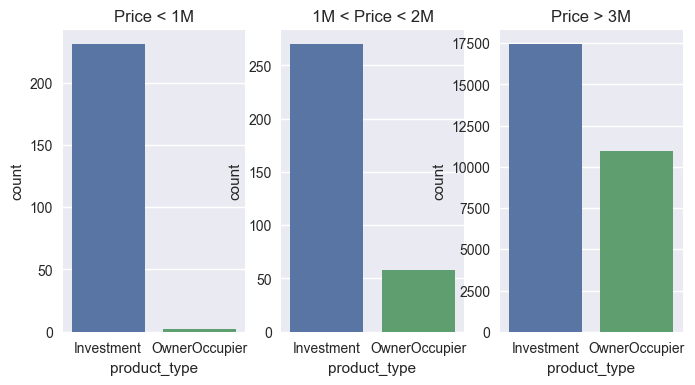

In [67]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(131); 
sns.countplot(train_df[train_df['price_doc'] < 1000000]['product_type'].dropna(), ax=axes1);

axes2 = fig.add_subplot(132); 
sns.countplot(train_df[train_df['price_doc'] > 1000000][train_df['price_doc'] < 2000000]['product_type'].dropna(), ax=axes2);

axes3 = fig.add_subplot(133); 
sns.countplot(train_df[train_df['price_doc'] > 2000000]['product_type'].dropna(), ax=axes3);

#axes1.set_xlim(-1, 20);
#axes2.set_xlim(-1, 20);

axes1.set_title("Price < 1M")
axes2.set_title("1M < Price < 2M")
axes3.set_title("Price > 3M")

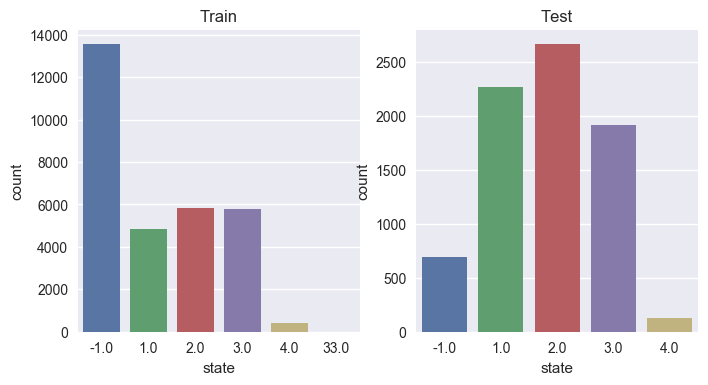

In [72]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.countplot(train_df['state'].fillna(-1), ax=axes1);

axes2 = fig.add_subplot(122); 
sns.countplot(test_df['state'].fillna(-1), ax=axes2);

#axes1.set_xlim(-1, 20);
#axes2.set_xlim(-1, 20);

axes1.set_title("Train")
axes2.set_title("Test")

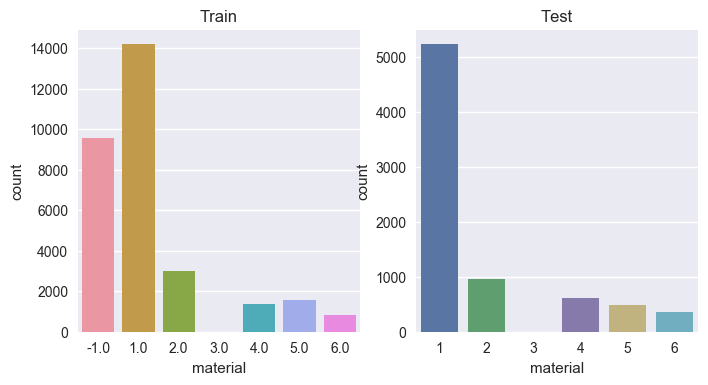

In [75]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
sns.countplot(train_df['material'].fillna(-1), ax=axes1);

axes2 = fig.add_subplot(122); 
sns.countplot(test_df['material'].fillna(-1), ax=axes2);

#axes1.set_xlim(-1, 20);`
#axes2.set_xlim(-1, 20);

axes1.set_title("Train")
axes2.set_title("Test")

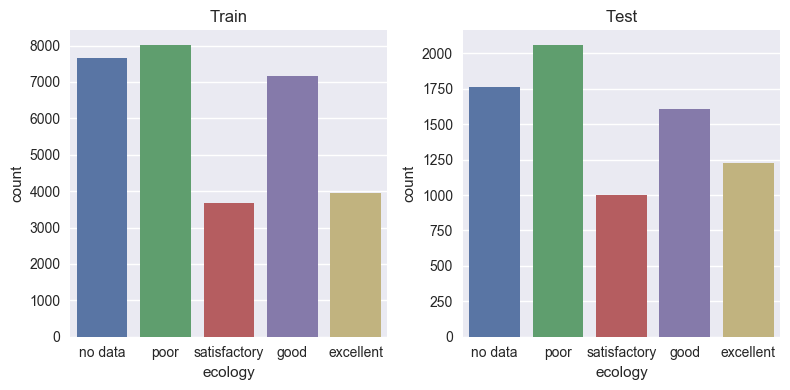

In [152]:
fig = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.countplot(train_df['ecology'].fillna(-1), ax=axes1, order=['no data', 'poor', 'satisfactory', 'good', 'excellent']);
sns.countplot(test_df['ecology'].fillna(-1), ax=axes2, order=['no data', 'poor', 'satisfactory', 'good', 'excellent']);

#axes1.set_xlim(-1, 20);`
#axes2.set_xlim(-1, 20);

axes1.set_title("Train")
axes2.set_title("Test")

fig.tight_layout();